## **<center>Logistic Regression - FIFA 2018 Dataset Project</center>**

<a name = Section2></a>
# **Problem Statement**
---

- Football Federation organizes world cup every four years and they collect statistics report about different playing countries and their players.

- They always spend a lot of time going through the statistics report manually to find the player with the best performance and reward him with the title of man of the match.

- Recent they have released this stat to the public and one of football fanatic company called DreamFootball has taken up the challenge of predicting the outcome before they announce the title of man of the match.

- They have hired a group of data scientist to do this task, consider you as one of them.

<a name = Section33></a>
### **Importing Libraries**

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")  

<a name = Section33></a>
### **Data Acquisition**

In [221]:
dffifa=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
dffifa.sample(n=5)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
51,22-06-2018,Switzerland,Serbia,2,58,20,5,8,7,7,...,1,0,0,Yes,52.0,Group Stage,No,0,NaN,NaN
61,24-06-2018,Senegal,Japan,2,46,14,7,5,2,5,...,3,0,0,Yes,11.0,Group Stage,No,0,NaN,NaN
113,06-07-2018,France,Uruguay,2,58,11,2,7,2,3,...,2,0,0,Yes,40.0,Quarter Finals,No,0,NaN,NaN
20,17-06-2018,Brazil,Switzerland,1,52,20,4,9,7,7,...,1,0,0,Yes,20.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN


<a name = Section4></a>
- The Dataset consist of statistics report for differernt countries that too part in FIFA 2018.We need to predict the Man of the match award using this statistics before the official announcement that will be made right after the match.

||Column Name|Description|
|:--|:--|:--|
||**Date**| match Date|
||**Team**| Playing Team |
||**Opponent**| Opponent Team|
||**Goal Scored**| Number of goals scored by this team|
||**Ball Possession**| %Amount of time ball was in control by the team|
||**Attemps**| Number of attempts to score goal|
||**On**| TargetNumber of shots on-target|
||**Off**| TargetNumber of shots that went off-target|
||**Blocked**| Number of opponent team's attempts blocked by the team|
||**Corners**| Number of corner shots used|
||**Offsides**| Number of off-side events|
||**Free Kicks**| Number of free-kicks used|
||**SavesNumber**| saves by the goal keeper|
||**Pass Accuracy**| %Percentage of passes that reached the same team player as aimed|
||**Passes**| Total number of passes by the team|
||**Distance Covered (Kms)**| Total distance covered by the team members in this game|
||**Fouls Committed**| Number of fouls committed by the team members|
||**Yellow Card**| Number of Yellow warning received|
||**Yellow & Red**| Number of Yellow & Red warning received|
||**Red**| Number of Red cards received|
||**Man of the Match**| Did this team member win Man of the Match?|
||**1st Goal**| When did the team score the 1st goal?|
||**Round**| Stage of the match|
||**PSO**| Was there a penalty shootout (PSO) in this match?|
||**Goals in PSO**| Number of goals scored in the Penalty shootout|
||**Own goals**| Number of own goals|
||**Own goal Time**| When did the team score own goal?|

<a name = Section41></a>
### **Data Info, Data Description and Null Value Checking**

- In this section we will get **description** and **statistics** about the data.

In [222]:
dffifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [227]:
dffifa.isna().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                    0
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [224]:
dffifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Goal Scored,128.0,1.320312,1.156519,0.0,0.00,1.0,2.00,6.0
Ball Possession %,128.0,49.992188,10.444074,25.0,42.00,50.0,58.00,75.0
Attempts,128.0,12.593750,5.245827,3.0,9.00,12.0,15.00,26.0
On-Target,128.0,3.914062,2.234403,0.0,2.00,3.5,5.00,12.0
Off-Target,128.0,5.273438,2.409675,1.0,4.00,5.0,7.00,11.0
Blocked,128.0,3.359375,2.403195,0.0,1.75,3.0,4.00,10.0
Corners,128.0,4.718750,2.446072,0.0,3.00,5.0,6.00,11.0
Offsides,128.0,1.343750,1.193404,0.0,0.00,1.0,2.00,5.0
Free Kicks,128.0,14.890625,4.724262,5.0,11.00,15.0,18.00,26.0
Saves,128.0,2.726562,2.049447,0.0,1.00,2.0,4.00,9.0


<a name = Section41></a>
### **Data Pre-processing**

In [225]:
#Filling null values in 1st Goal column with mean
dffifa['1st Goal'].fillna(dffifafinal['1st Goal'].mean(),inplace=True)

In [226]:
#Converting Man of the Match column values to 1/0 from Yes/No
dffifa['Man of the Match']= dffifa['Man of the Match'].map(dict(Yes=1, No=0))

In [228]:
dffifa.sample(n=5)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
99,30-06-2018,Portugal,Uruguay,1,61,20,5,1,8,10,...,1,0,0,0,55.0,Round of 16,No,0,NaN,NaN
20,17-06-2018,Brazil,Switzerland,1,52,20,4,9,7,7,...,1,0,0,1,20.0,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,1,89.0,Group Stage,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,1,18.0,Final,No,0,1.0,18.0
26,18-06-2018,Tunisia,England,1,41,6,1,3,2,2,...,0,0,0,0,11.0,Group Stage,No,0,NaN,NaN


In [158]:
#dffifa[dffifa['Team'].isin(['Mexico'])]
#dffifa[dffifa['Team'].str.contains('Mex')]

In [159]:
#Observations
#Date columns can be removed as it is not correct feature to predict Man of the Match
#Own goals and Own goal Time columns can be dropped as 90% data having nulls
#Attempts = On-Target+Off-Target+Blocked

In [229]:
#dropping the Date column as it is contains highly cordinal data 
#dropping Own goals and Own goal Time columns as 90% data having nulls
dffifa.drop(columns=['Date','Own goals','Own goal Time'],inplace=True)

<AxesSubplot:>

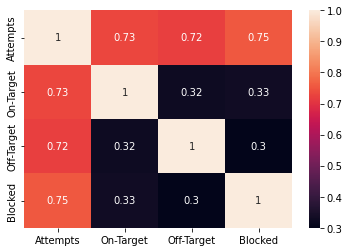

In [230]:
sns.heatmap(dffifa[['Attempts','On-Target','Off-Target','Blocked']].corr(),annot=True)

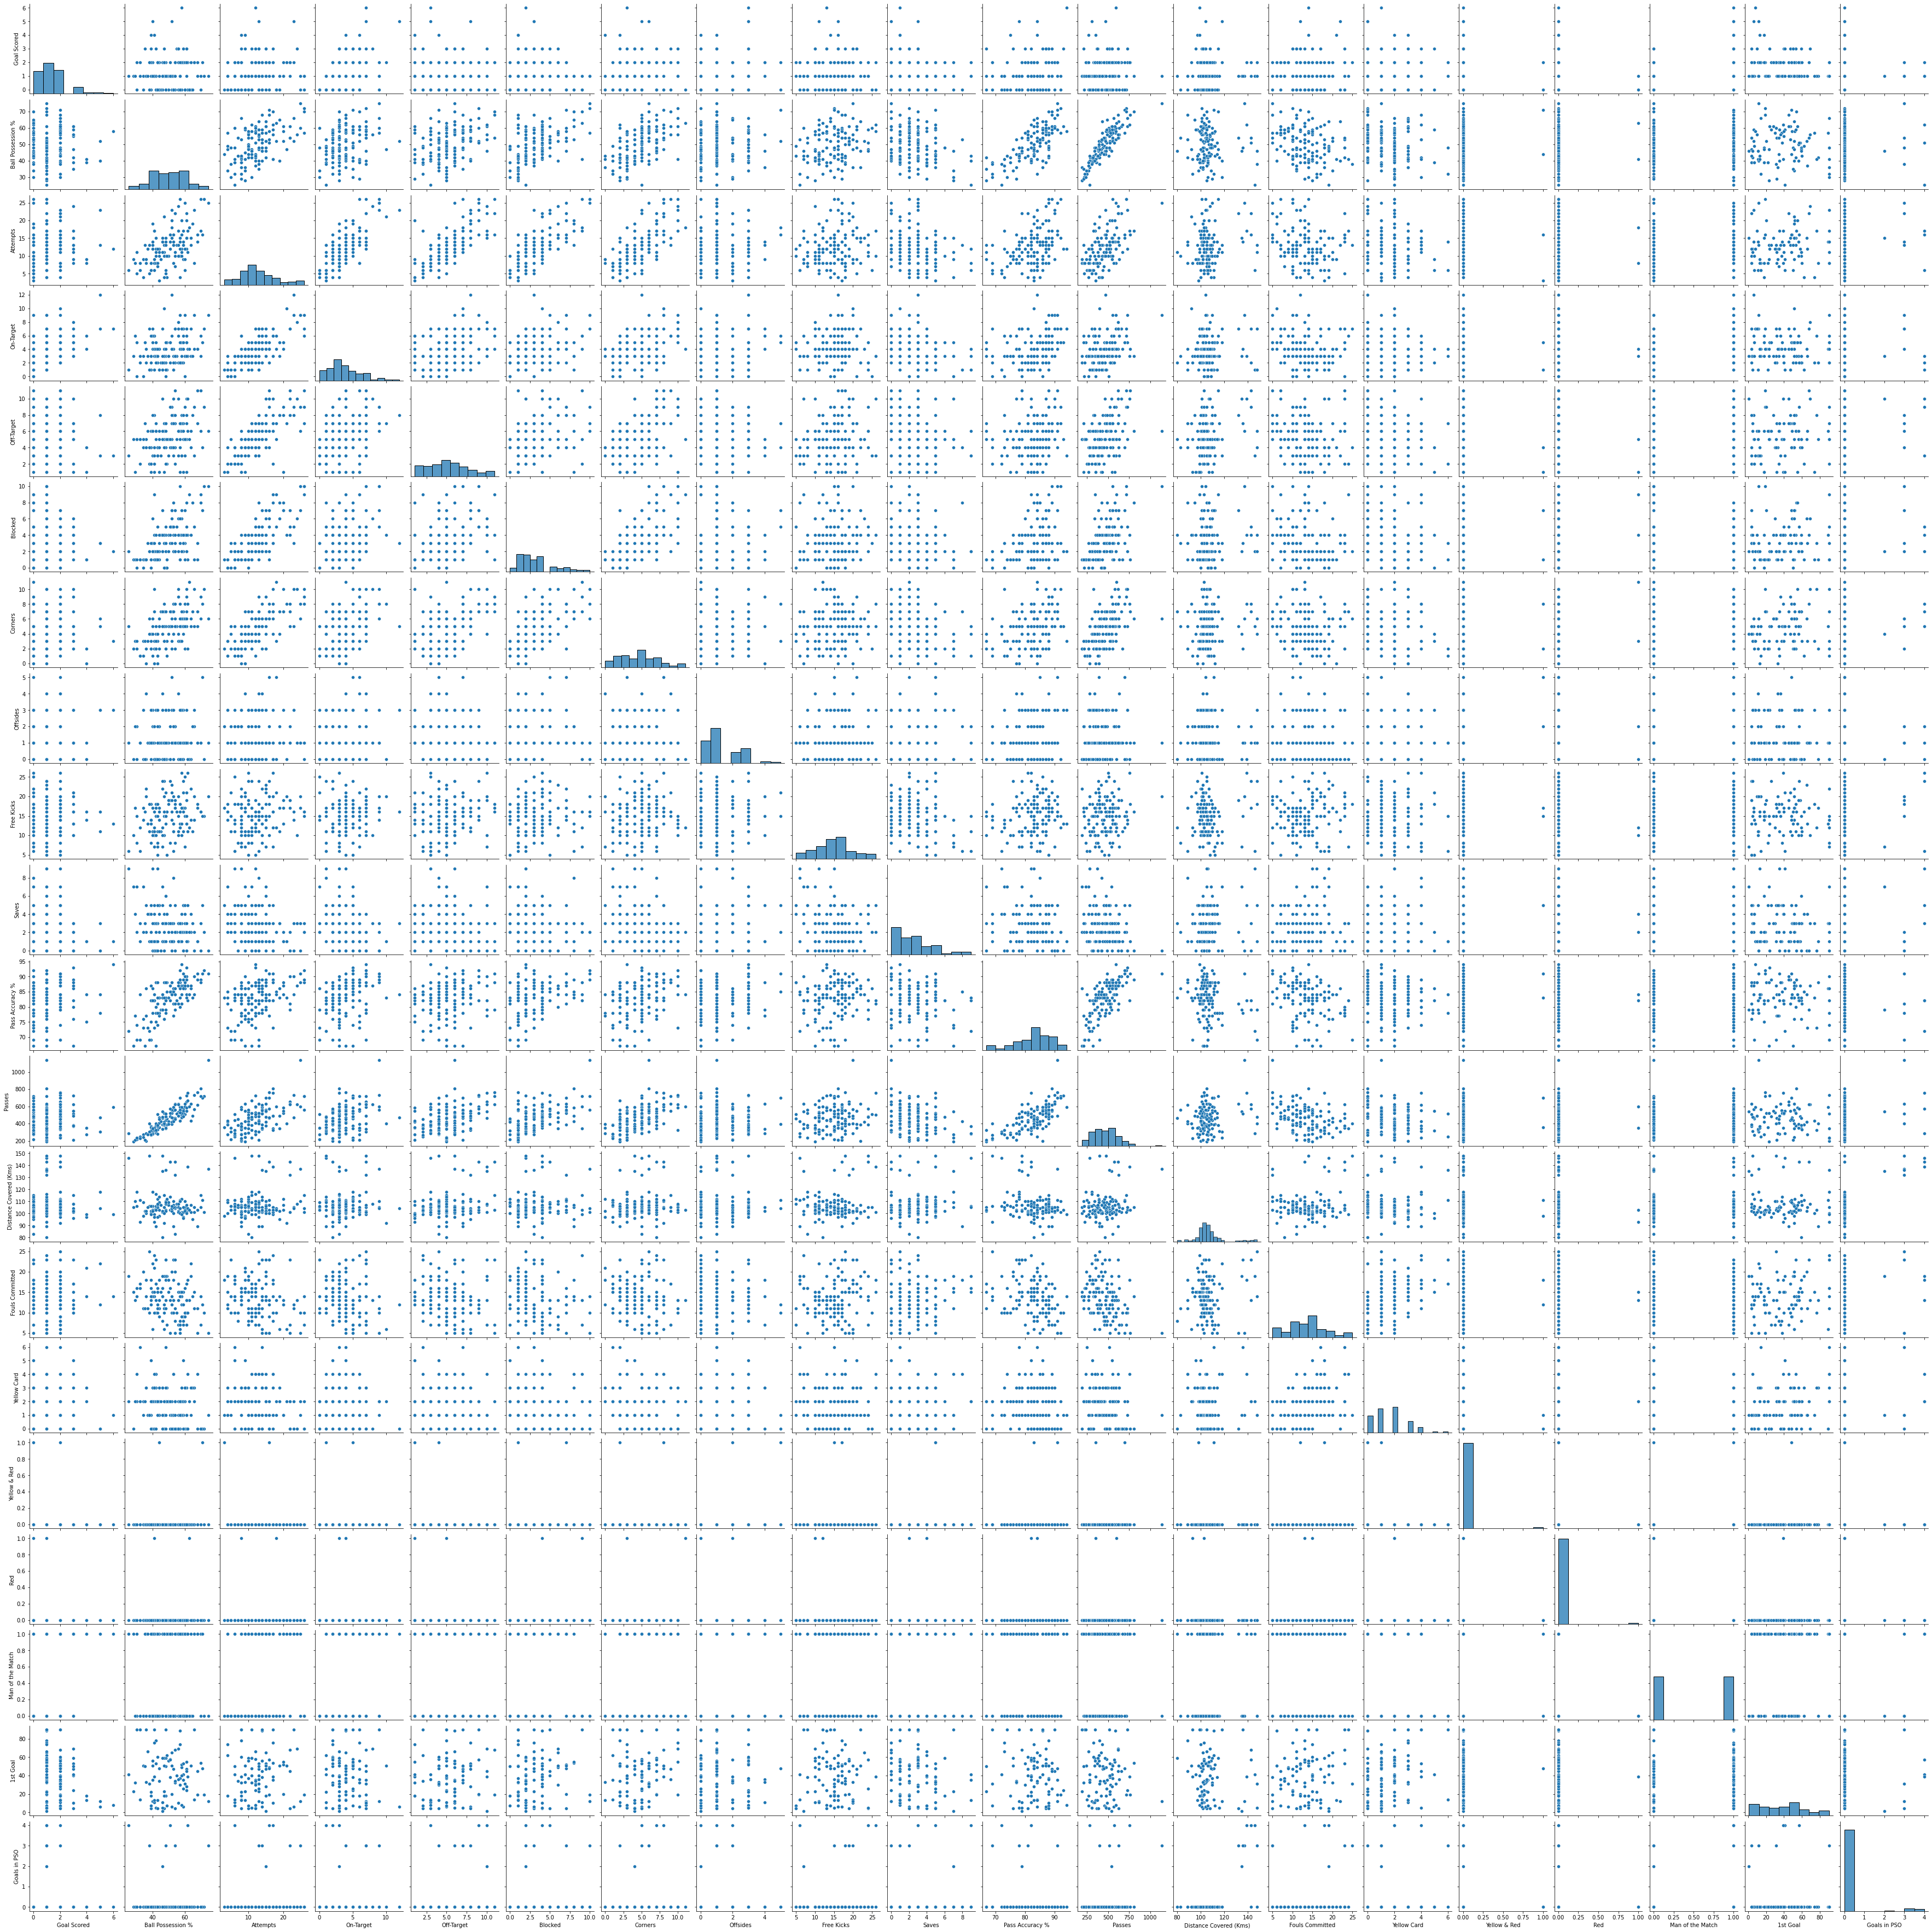

In [162]:
sns.pairplot(dffifa)

In [196]:
dffifa['Round'].unique()

array(['Group Stage', 'Round of 16', 'Quarter Finals', 'Semi- Finals',
       '3rd Place', 'Final'], dtype=object)

In [197]:
from sklearn.preprocessing import LabelEncoder

In [231]:
le=LabelEncoder()
dfRound = dffifa[['Round']].apply(le.fit_transform)

In [232]:
dffifa.drop(columns=['Round'],inplace=True)

In [233]:
dffifa=dffifa.join(dfRound['Round'])

In [234]:
dffifa['Opponent']=dffifa['Opponent'].apply(lambda x:'Opp_'+x)

In [235]:
dffifafinal=pd.get_dummies(dffifa,columns=['Team','Opponent'],drop_first=True)

In [236]:
dffifafinal[['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Man of the Match', '1st Goal', 'PSO', 'Goals in PSO', 'Round']]

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,PSO,Goals in PSO,Round
0,5,40,13,7,3,3,6,3,11,0,...,118,22,0,0,0,1,12.000000,No,0,2
1,0,60,6,0,3,3,2,1,25,2,...,105,10,0,0,0,0,39.457447,No,0,2
2,0,43,8,3,3,2,0,1,7,3,...,112,12,2,0,0,0,39.457447,No,0,2
3,1,57,14,4,6,4,5,1,13,3,...,111,6,0,0,0,1,89.000000,No,0,2
4,0,64,13,3,6,4,5,0,14,2,...,101,22,1,0,0,0,39.457447,No,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,...,148,14,1,0,0,0,5.000000,No,0,5
124,2,43,12,4,3,5,4,1,5,5,...,108,11,1,0,0,1,4.000000,No,0,0
125,0,57,15,5,7,3,5,0,12,2,...,110,5,2,0,0,0,39.457447,No,0,0
126,4,39,8,6,1,1,2,1,14,1,...,99,14,2,0,0,1,18.000000,No,0,1


In [237]:
dffifafinal['PSO'].unique()

array(['No', 'Yes'], dtype=object)

In [238]:
dffifafinal['PSO']= dffifa['PSO'].map(dict(Yes=1, No=0))

In [206]:
from sklearn.preprocessing import RobustScaler

In [207]:
rbs=RobustScaler()

<a name = Section41></a>
### **Splitting the Data**

In [239]:
X=dffifafinal.drop('Man of the Match',axis=1)
y=dffifafinal['Man of the Match']

In [240]:
X=pd.DataFrame(rbs.fit_transform(X),columns=X.columns)

In [210]:
X.sample(n=3)

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Opp_Portugal,Opponent_Opp_Russia,Opponent_Opp_Saudi Arabia,Opponent_Opp_Senegal,Opponent_Opp_Serbia,Opponent_Opp_Spain,Opponent_Opp_Sweden,Opponent_Opp_Switzerland,Opponent_Opp_Tunisia,Opponent_Opp_Uruguay
104,0.5,-0.1875,1.500000,2.166667,0.666667,0.444444,1.000000,-0.5,0.714286,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.5,1.1250,0.666667,0.166667,2.000000,-0.888889,0.666667,0.0,0.428571,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,-1.1250,-0.666667,-0.500000,0.000000,-0.888889,-1.333333,0.0,-0.428571,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name = Section41></a>
### **Train and Predict Using LogisticRegression Model**

In [211]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [213]:
lr=LogisticRegression()

In [243]:
lr.fit(X_train,y_train)

LogisticRegression()

In [244]:
predictions=lr.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [245]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[8 5]
 [4 9]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.64      0.69      0.67        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



In [246]:
print(f1_score(y_test,predictions))

0.6666666666666666


<a name = Section41></a>
### **Train and Predict Using RandomForestRegressor Model**

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
rfc=RandomForestClassifier()

In [249]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [250]:
predictions_rfc=rfc.predict(X_test)

In [251]:
predictions_rfc

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [265]:
print(confusion_matrix(y_test,predictions_rfc))
print(classification_report(y_test,predictions_rfc))
print("Accuracy Score {}".format(accuracy_score(y_test,predictions_rfc)))

[[ 8  5]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.67      0.77      0.71        13

    accuracy                           0.69        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.70      0.69      0.69        26

Accuracy Score 0.6923076923076923


In [253]:
print(f1_score(y_test,predictions_rfc))

0.7142857142857142


#### Randomized Search Cv

In [258]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [259]:
rf_randomcv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [260]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [261]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [262]:
best_random_grid=rf_randomcv.best_estimator_

In [263]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 8  5]
 [ 1 12]]
Accuracy Score 0.7692307692307693
Classification report:               precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



In [264]:
print(f1_score(y_test,y_pred))

0.8000000000000002


<a name = Section41></a>
### **Train and Predict Using DecisionTreeClassifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [254]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [255]:
predictions_dtc=dtc.predict(X_test)

In [256]:
print(confusion_matrix(y_test,predictions_dtc))
print(classification_report(y_test,predictions_dtc))

[[10  3]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26



In [257]:
print(f1_score(y_test,predictions_dtc))

0.7692307692307693
